# Class 11: Modelling data and inferential statistics 

This class notebook is designed to let you practice the basics of modelling simple datasets and testing null hypotheses. The datasets are small and simple compared to the project datasets. This is so that you can learn the concepts of data modelling and hypothesis testing without the additional burden of cleaning and manipulating large, messy datasets. 

In this notebook you are analysing datasets of two variables: one response variable and one explanatory variable. In the first three datasets the explanatory variable is categorical and the response variable is numerical. In the last three datasets both the explanatory and the response variables are numerical.

Everything you need to complete these analyses is covered in today's lecture and the accompanying example notebooks. The example notebooks work through the examples in the lecture in more detail. You should make use of those as a reference to completing the analyses in this notebook.

## Imports

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols

warnings.filterwarnings("ignore")

## Part 1. One categorical explanatory variable. Numerical response variable.

### Do the horns of horned-lizards protect them from predation?

<div>
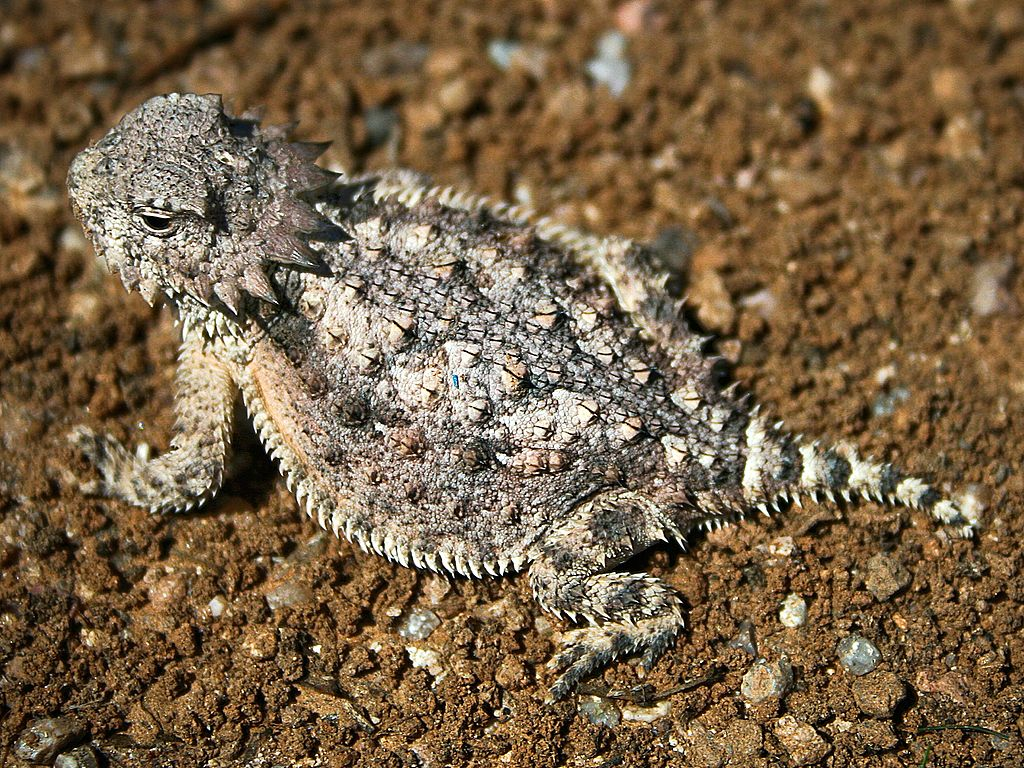
</div>

The horned lizard *Phrynosoma macallii* is named for the fringe of horns surrounding the head. What are the horns for? One idea proposed by researchers is that they offer some protection against being eaten by one of their main predators, the loggerhead shrike, *Lanius ludovicianus*. The shrike skewers the lizard on thorns or barbed wire to save for later eating.

The researchers measured the horn lengths of horned lizards that had not been predated (and hence were alive and free at some point in time) and the horn lengths of lizards that had been predated (and hence were skewered and dead at the same point in time). If their hypothesis were true then we might expect to see a difference in mean horn lengths between living and killed lizards. But if their hypothesis is wrong then we might expect to see no such difference.

The data collected by the researchers are in the file `../Datasets/horned_lizards.csv`.

<div class="alert alert-warning">

Use the [ladybirds.ipynb](ladybirds.ipynb) notebook to help you answer this question.
</div>

- Read in the data and use an appropriate graph to visually examine the relationship between horn length and predation status. 

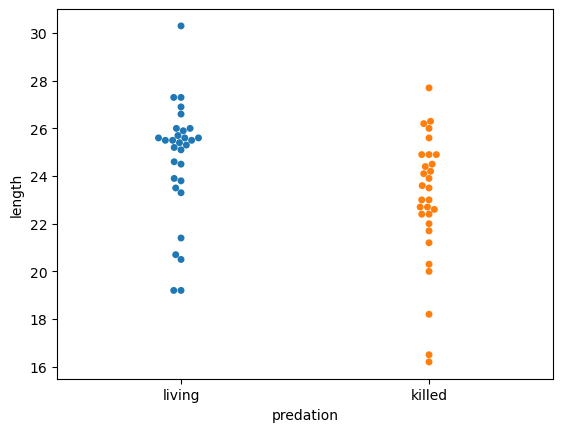

In [3]:
lizards = pd.read_csv('../Datasets/horned_lizards.csv')
lizards
sns.swarmplot(x='predation', y='length', data=lizards);

- State the null and alternative hypotheses. 

> Write your null and alternative hypotheses here

- H0: Mean horn lengths of predated and non-predated horned lizards are the same.
- HA: Mean horn lengths of predated and non-predated horned lizards are different.

- Write the model formula for the relationship between horn length and predation status.
- Fit the model and test the null hypothesis.

In [4]:
formula = 'length ~ predation'
fit = ols(formula, lizards).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,22.9867,0.472,48.704,0.000,22.042,23.931
predation[T.living],1.7100,0.667,2.562,0.013,0.374,3.046


- Report the outcome of the test as you would in a scientific report or paper. This means report the estimate of the difference including its 95% CI, the value of the test-statistic (in this case *t*) and the *p*-value. Also say whether the the outcome supports or not the biological hypothesis.

> Write your conclusion here.

Mean horn length of horned lizards that lived is 1.7 mm longer (95%CI [0.4, 3.0] mm) than that of lizards that were killed (*t* = 2.6, *p* = 0.013). This supports the hypothesis that the horns of horned lizards offer some protection against being eaten by one of their main predators, the loggerhead shrike, *Lanius ludovicianus*.

### Can light shone on knees reset your circadian clock?

<div>
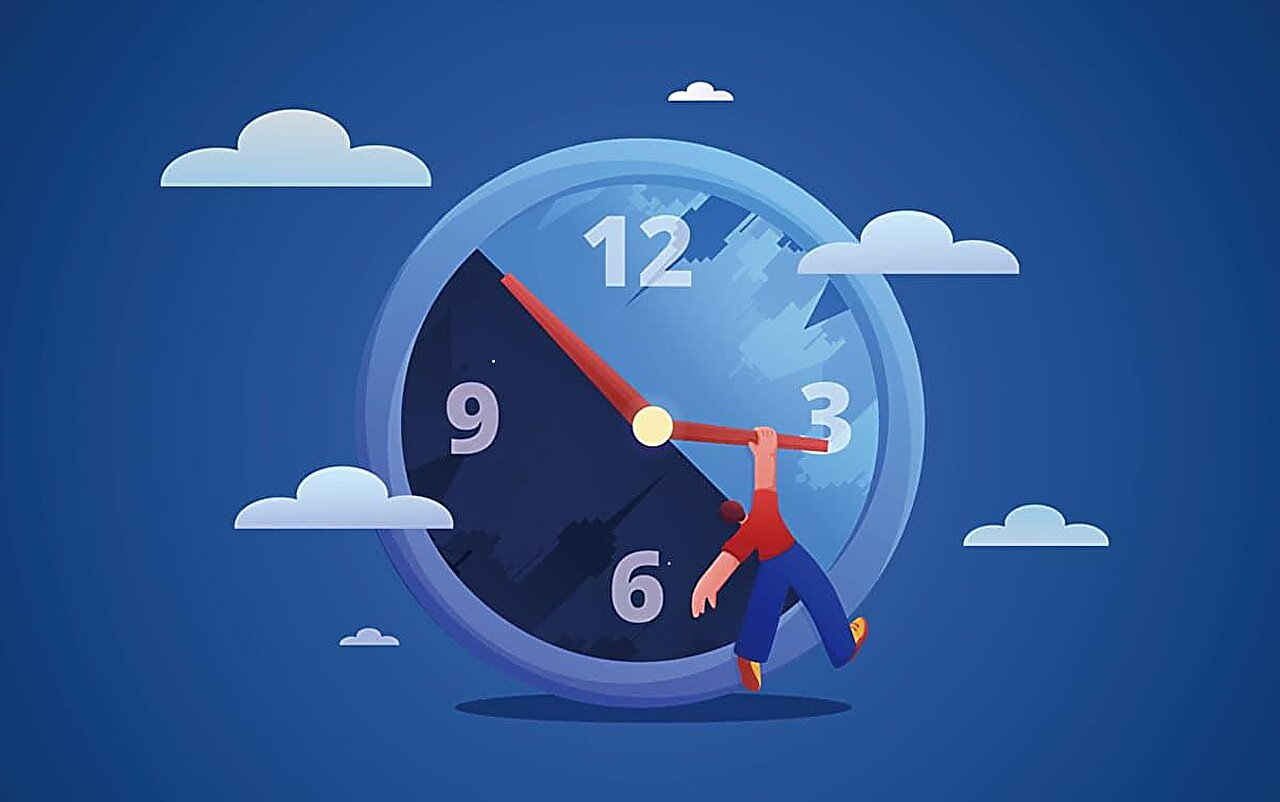
</div>

A scientific paper published in 1998 reported that the circadian clock of people with jetlag can be reset by shining light on the backs of their knees. A later paper reexamined this controversial result. The new experiment measured the phase shift in the circadian cycle of people woken from sleep and subjected to one of three interventions: 1) Light shone in eyes only, 2) light shone on backs of knees only, or 3) no light shone at all. This last intervention is the control group against which the other two interventions were compared. The phase shift was measured after two days of intervention.

The data are in the file `../Datasets/knees.csv`. The variable `shift` is the phase shift measured in hours.

There are two biological hypotheses here. 
1. Shining light on the backs of knees causes a phase shift in the circadian clock.
2. Shining light on eyes causes a phase shift in the circadian clock.

<div class="alert alert-warning">

Use the [ladybirds.ipynb](ladybirds.ipynb) notebook to help you answer this question.
</div>

- Read in the data and use an appropriate graph to visually examine the relationship between light treatment and phase shift. 

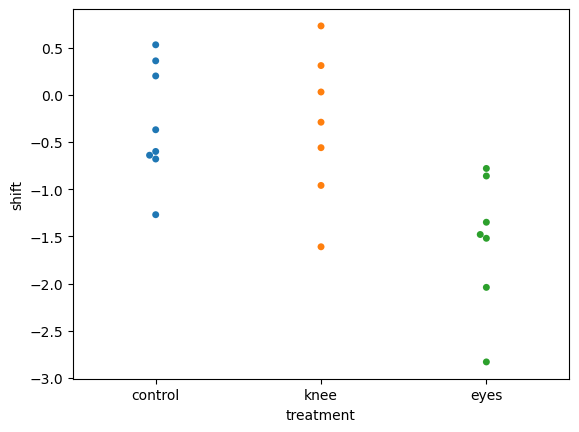

In [5]:
knees = pd.read_csv('../Datasets/knees.csv')
knees
sns.swarmplot(x='treatment', y='shift', data=knees);


- State the null and alternative hypotheses for both biological hypotheses. 

> Write your null and alternative hypotheses here.

- H0: Mean phase shifts between "knee" and control treatments are the same.
- HA: Mean phase shifts between "knee" and control treatments are different.
- H0: Mean phase shifts between "eye" and control treatments are the same.
- HA: Mean phase shifts between "eye" and control treatments are different.

Although the explanatory variable "treatment" has three levels, "control", "knee" and "eyes", we still write the model formula as 

    'response variable ~ explanatory variable'
    
Python will know that the explanatory variable "treatment" has three levels and its summary output table will contain these three estimates:
1. The estimate of the mean phase shift of "control"
2. The estimate of the difference in the mean phase shifts between "control" and "eyes"  
3. The estimate of the difference in the mean phase shifts between "control" and "knee"  

- Write the model formula for the relationship between phase shift and light treatment.
- Fit the model and test the null hypotheses.

In [6]:
formula = 'shift ~ treatment'
fit = ols(formula, knees).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-0.3087,0.249,-1.241,0.230,-0.830,0.212
treatment[T.eyes],-1.2427,0.364,-3.411,0.003,-2.005,-0.480
treatment[T.knee],-0.0270,0.364,-0.074,0.942,-0.790,0.736


- Report the outcome of the test as you would in a scientific report or paper. This means report the estimates of the differences including their 95% CIs, the values of the test-statistic (in this case *t*) and the *p*-values. Also say whether the the outcomes support or not the biological hypotheses.

> Write your conclusion here.

Shining light in eyes significantly shifted the circadian clock by 1.2 hours (95% [0.5, 2.0] hours) relative to no intervention after two days (*t* = 3.4, *p* = 0.003). Whereas shining light on the backs of knees had no significant effect on the circadian clock (*t* = 0.07, *p* = 0.9) relative to no intervention.

In the 1998 study it was later found that the subjects had inadvertently experienced low levels of light to their eyes.

### Can drugs extend life?

<div>
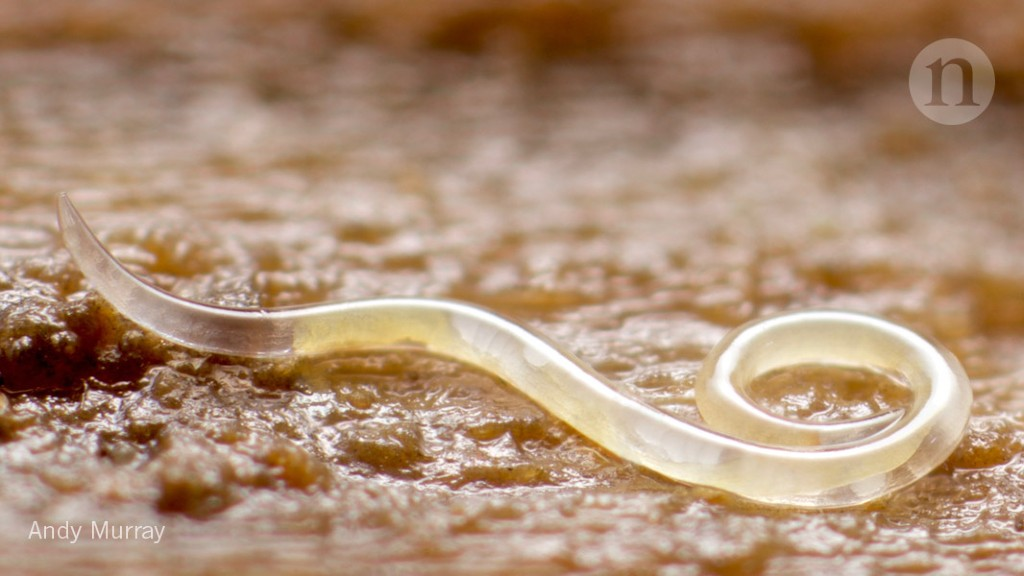
</div>

Are there drugs that extend lifespan? In one study scientists examined if the drug trimethadione could extend the lifespan of nematode worms. There were three trimethadione treatments and a control treatment of water against which the trimethadione treatments were compared. Trimethadione was administered at the larval stage, the adult stage and at both life stages.  

The data in the file `../Datasets/lifespan.csv` are the lifespans in days of the treated and control nematode worms.

<div class="alert alert-warning">

Use the [ladybirds.ipynb](ladybirds.ipynb) notebook to help you answer this question.
</div>

- Read in the data and use an appropriate graph to visually examine the relationship between trimethadione treatment and lifespan. 

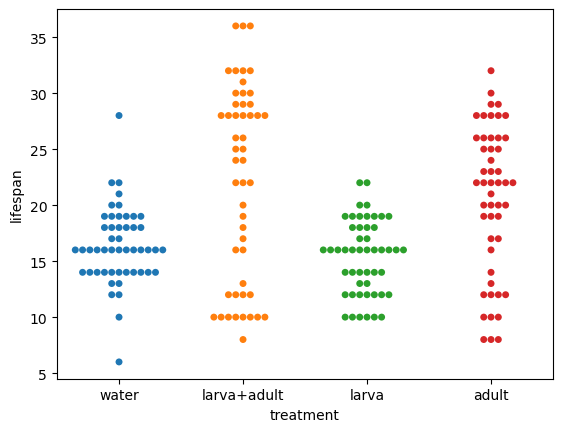

In [7]:
lifespan = pd.read_csv('../Datasets/lifespan.csv')
lifespan
sns.swarmplot(x='treatment', y='lifespan', data=lifespan);


- State the null and alternative hypotheses for all three biological hypotheses. 

> Write your null and alternative hypotheses here.

- H0: Mean lifespan of larval treated and control nematodes are the same.
- HA: Mean lifespan of larval treated and control nematodes are different.
- H0: Mean lifespan of adult treated and control nematodes are the same.
- HA: Mean lifespan of adult treated and control nematodes are different.
- H0: Mean lifespan of larval+adult treated and control nematodes are the same.
- HA: Mean lifespan of larval+adult treated and control nematodes are different.

- Write the model formula for the relationship between trimethadione treatment and lifespan.
- "water" is the control treatment, and it is against this that you need to test the three trimethadione treatments. However, `ols` will automatically set "adult" as the reference level as it is alphabetically first. That means you will need to manually set "water" to the reference level. See how to do this in [ladybirds.ipynb](ladybirds.ipynb).
- Fit the model and test the null hypotheses.

In [8]:
formula = 'lifespan ~ C(treatment, Treatment(reference=3))'
fit = ols(formula, lifespan).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,16.3400,0.841,19.434,0.000,14.682,17.998
"C(treatment, Treatment(reference=3))[T.adult]",4.2000,1.189,3.532,0.001,1.855,6.545
"C(treatment, Treatment(reference=3))[T.larva]",-0.9600,1.189,-0.807,0.420,-3.305,1.385
"C(treatment, Treatment(reference=3))[T.larva+adult]",5.8800,1.189,4.945,0.000,3.535,8.225


- Report the outcome of the tests as you would in a scientific report or paper.

> Write your conclusion here.

Untreated nematodes had a mean lifespan of 16.3 days (95% CI [14.7, 18.0]). Mean lifespan was not significantly increased when larva were treated with trimethadione (*t* = 0.8, *p* = 0.4). Mean lifespan was significantly increased by 4.2 days when adults were treated with trimethadione (95% CI [1.9, 6.5], *t* = 3.5, *p* = 0.001). Mean lifespan was significantly increased by 5.9 days when larva and adults were treated with trimethadione (95% CI [3.5, 8.2], *t* = 4.9, *p* < 0.001). This evidence suggests that trimethadione treatment of larva stages of nematode worms increases their lifespan from 2 to 8 days.

## Part 2. One numerical explanatory variable. Numerical response variable.

### Is soil nitrogen content affected by the number of different earthworm species?

<div>
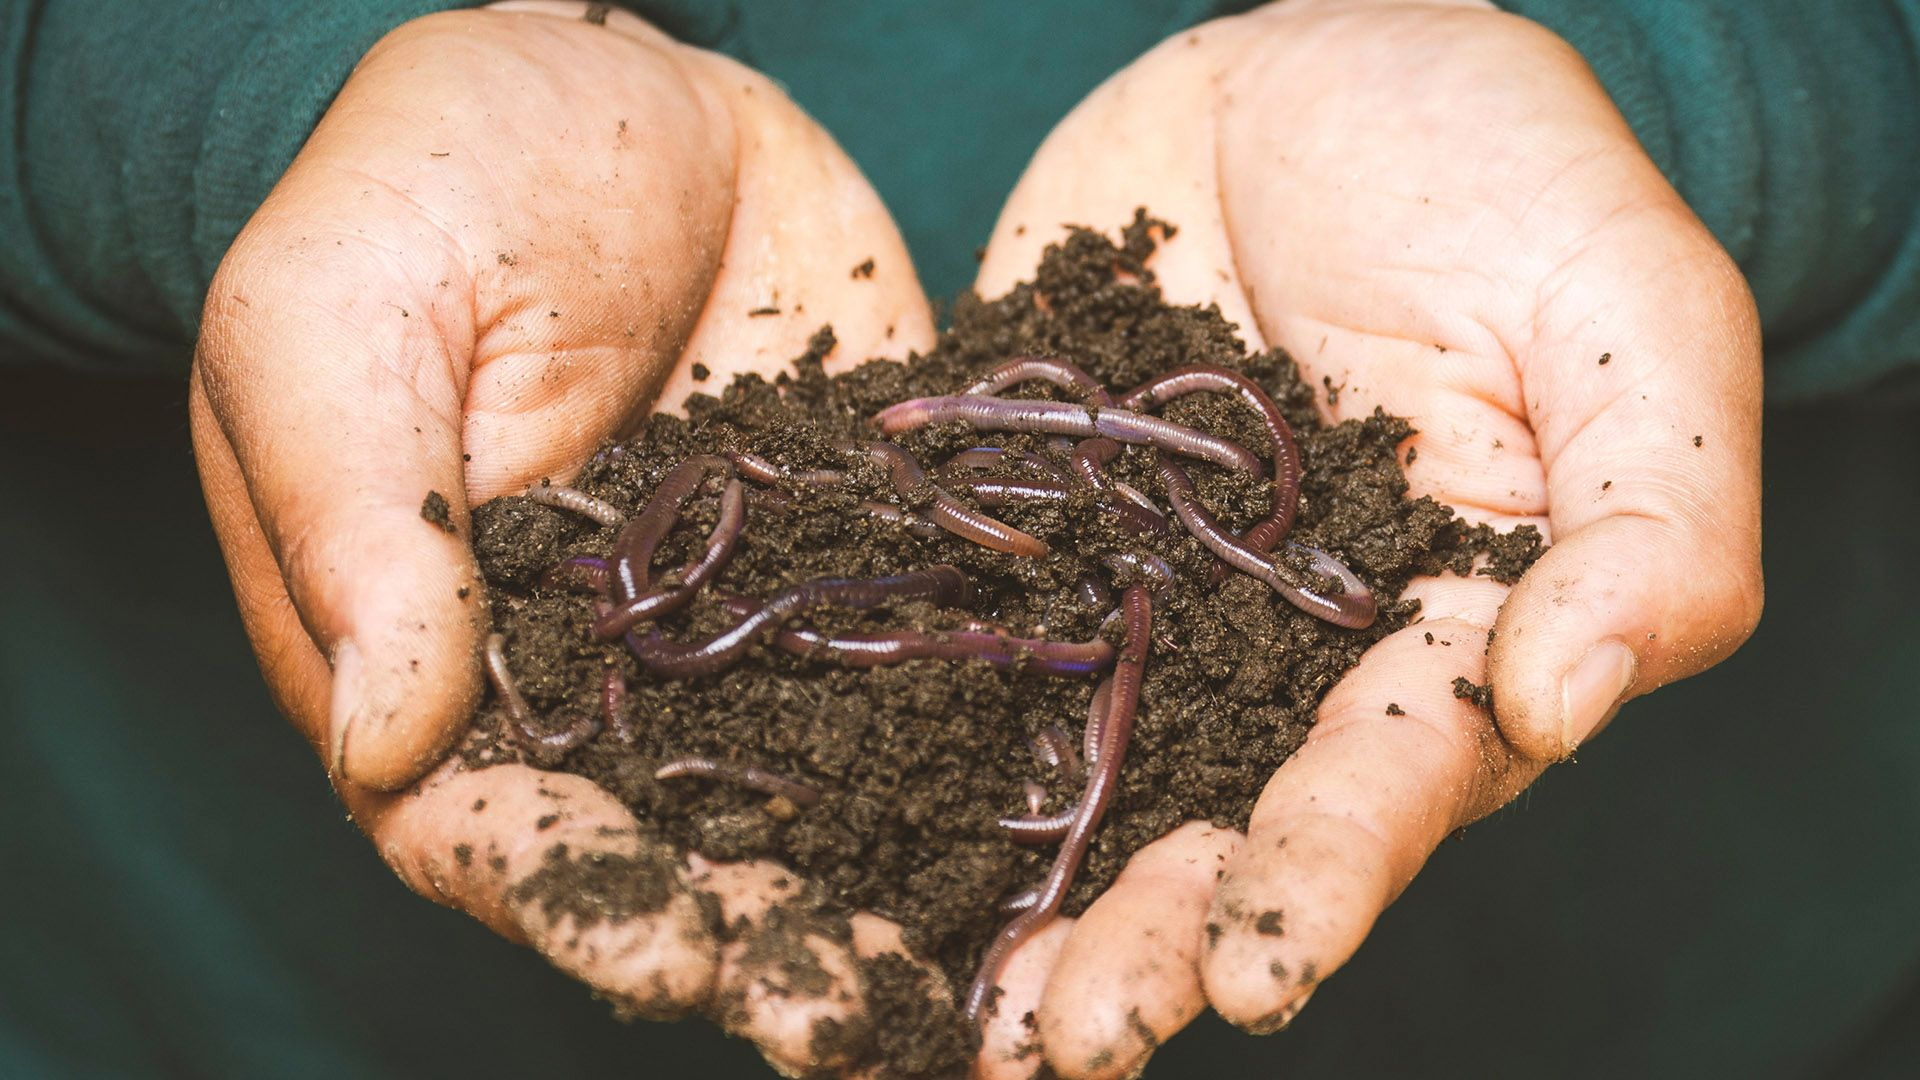
</div>

The forests of northern USA and Canada have no native earthworms. However, earthworms have been introduced by humans and are dramatically changing the soil. To examine if earthworms are changing the nitrogen content of soil, scientists measured nitrogen content and the number of different species of earthworms in 39 hardwood forests in Michigan. 


The data are in the file `../Datasets/earthworms.csv`. Nitrogen content is recorded as a percentage.

<div class="alert alert-warning">

Use the [rattlesnakes.ipynb](rattlesnakes.ipynb) notebook to help you answer this question.
</div>

- Read in the data and use an appropriate graph to visually examine the relationship between lion age and proportion of nose black. 

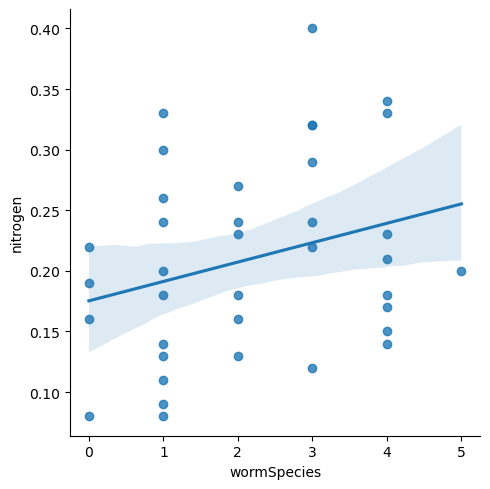

In [9]:
worms = pd.read_csv('../Datasets/earthworms.csv')
worms
sns.lmplot(x='wormSpecies', y='nitrogen', data=worms);

- State the null and alternative hypotheses regarding the relationship between nitrogen content and number of worm species. 

> Write your null and alternative hypotheses here.

- H0: The slope of the relationship between number of earthworm species and soil nitrogen content is zero.
- HA: The slope of the relationship between number of earthworm species and soil nitrogen content is not zero.

- Write the model formula for the relationship between number of earthworm species and soil nitrogen content.
- Fit the model and test the null hypothesis.

In [10]:
formula = 'nitrogen ~ wormSpecies'
fit = ols(formula, worms).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1753,0.024,7.389,0.000,0.127,0.223
wormSpecies,0.0160,0.009,1.756,0.088,-0.002,0.034


- Report the outcome of the test as you would in a scientific report or paper.

> Write your conclusion here.

There is no significant relationship between the number of species of earthworms and soil nitrogen content in north american forests (*t* = 1.8, *p* < 0.088).

### What is the relationship between "file" length and call frequency of bush crickets?

<div>
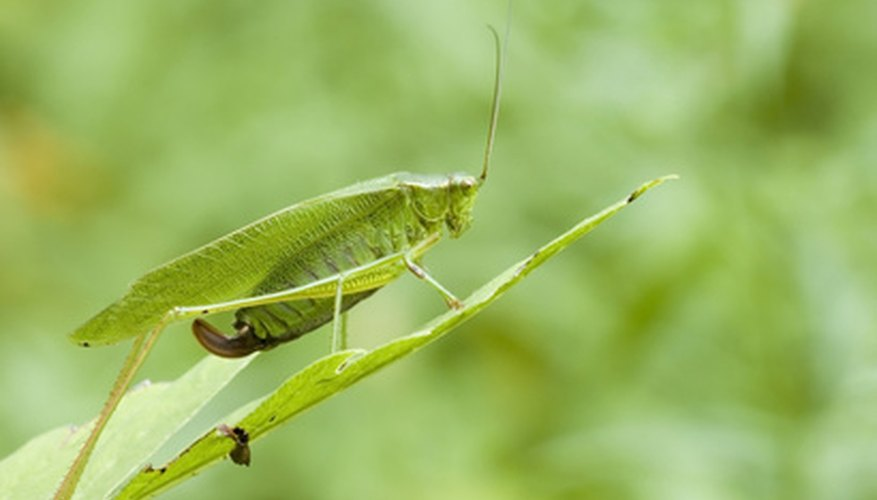
</div>

Bush crickets call by rubbing forewings together so that a scrapper on one wing rubs against a file on the other wing. Scientists wanted to know what the relationship was between file length and call frequency?

The file `../Datasets/bush_crickets.csv` contains the song frequency (in Hertz) and file length (in mm) of 58 crickets.

<div class="alert alert-warning">

Use the [brain_mass.ipynb](brain_mass.ipynb) notebook to help you answer this question.
</div>

- Read in the data and use an appropriate graph to visually examine the relationship between song frequency and file length.

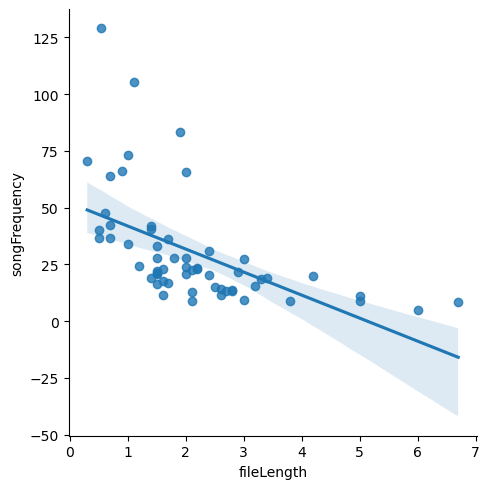

In [11]:
bc = pd.read_csv('../Datasets/bush_crickets.csv')
bc
sns.lmplot(x='fileLength', y='songFrequency', data=bc);

Seaborn's regression line does not fit the data well. It also predicts negative song frequencies for file lengths longer than about 5mm, which is impossible.

Try log-transforming file length or song frequency or both to examine whether the fit of the regression line improves. 

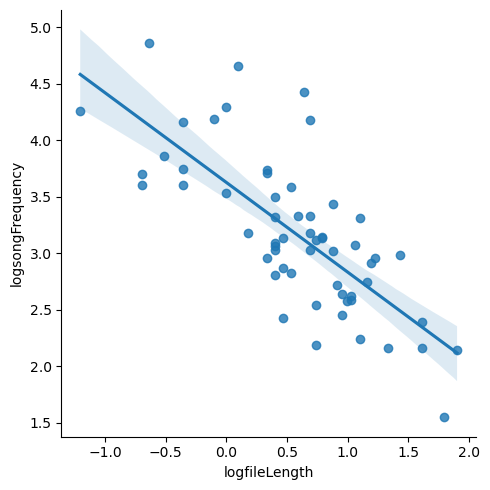

In [12]:
bc['logsongFrequency'] = np.log(bc['songFrequency'])
bc['logfileLength'] = np.log(bc['fileLength'])
sns.lmplot(x='logfileLength', y='logsongFrequency', data=bc);

You should find that log-transforming both song frequency and file length gives the best looking fit.

This means the relationship between file length and song frequency has the form

$$
\log(\mathrm{song\ frequency}) = \mathrm{intercept} + \mathrm{slope} \times \log(\mathrm{file\ length})
$$

- Write the model formula for the relationship between log song frequency and log file length.
- Fit the model.

In [13]:
formula = 'logsongFrequency ~ logfileLength'
fit = ols(formula, bc).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.6261,0.081,44.661,0.000,3.463,3.789
logfileLength,-0.7935,0.095,-8.377,0.000,-0.983,-0.604


- Write the formula for the relationship between song frequency and file length using the estimates from the model fit.
- Use the laws of logs to remove the logs from your formula.

$$
\log(\mathrm{song\ frequency}) = 3.63 - 0.79 \times \log(\mathrm{file\ length})
$$

$$
\mathrm{song\ frequency} = 37.3 \times \mathrm{file\ length}^{-0.79}
$$



- Report the outcome of the test as you would in a scientific report or paper.

> Write your conclusion here.

Bush cricket song frequency is related to file length with an exponent of -0.79 (95%CI: [-0.98, -0.64], *t* = 8.4, *p* < 0.001).

The fossil of an 165 million year old extinct bush cricket species *Archaboilus musicus* has been discovered. It's file length is 9.34 mm. What was its song frequency based on your analysis of living bush crickets.

In [14]:
print(f'{37.3*9.34**(-0.79):.1f} Hz')

6.4 Hz


### How to predict a corpse's date of birth from their teeth

<div>
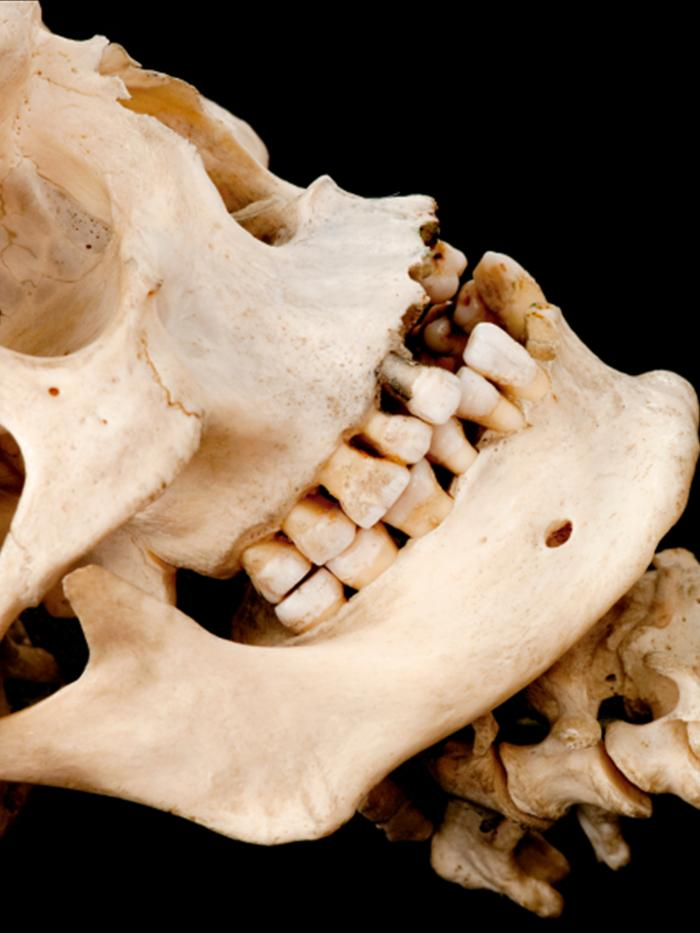
</div>

Between 1955 and 1963 nuclear bombs were tested above ground. This dramatically increased the amount of carbon-14 (<sup>14</sup>C) in the atmosphere and has slowly been falling ever since. <sup>14</sup>C finds its way into the enamel of developing teeth of children through digestion of plants which have fixed <sup>14</sup>C from the atmophere. And because enamel is non-regenerating, the amount of <sup>14</sup>C in teeth enamel can be used to estimate the age of corpses.

The file `../Datasets/carbon14.csv` contains known dates of births and $\Delta$<sup>14</sup>C of a sample of corpses. $\Delta$<sup>14</sup>C measures the amount of <sup>14</sup>C relative to a standard as a percentage.

- Read in the data and use an appropriate graph to visually examine the relationship between date of birth and the relative amount of <sup>14</sup>C. Plot $\Delta$<sup>14</sup>C on the *x*-axis as this is the explanatory variable. 

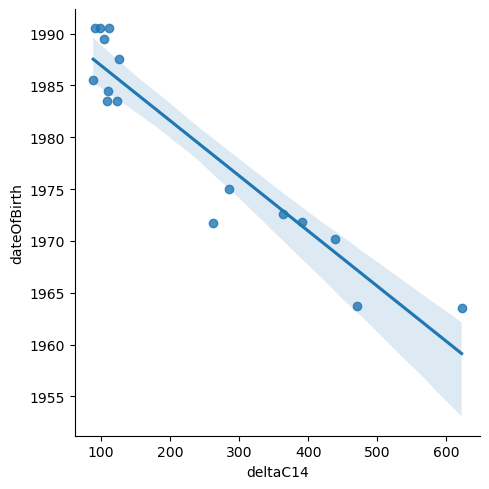

In [15]:
carbon = pd.read_csv('../Datasets/carbon14.csv')
carbon
sns.lmplot(x='deltaC14', y='dateOfBirth', data=carbon);

- Write the model formula for the relationship between date of birth and the relative amount of <sup>14</sup>C.
- Fit the model.

In [16]:
formula = 'dateOfBirth ~ deltaC14'
fit = ols(formula, carbon).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1992.2674,1.449,1375.262,0.000,1989.160,1995.374
deltaC14,-0.0533,0.005,-10.643,0.000,-0.064,-0.043


- Write down the mathemtical formula that gives the estimated mean date of birth as a function of $\Delta$<sup>14</sup>C.

> Write your formula here.

$\mathrm{dob} = 1992 - 0.053 \times \Delta^{14}\mathrm{C}$

You have been asked to predict the date of birth of a corpse based on a $\Delta$<sup>14</sup>C of 400%. You could give the estimated mean date of birth based on the formula you just wrote down. It's 1992 - 0.053 x 400 = 1970. But that's just the **mean** date of birth for all corpses with a $\Delta$<sup>14</sup>C of 400%. Date of birth will vary between corpses with a $\Delta$<sup>14</sup>C of 400%. This is evident in the lmplot - the data do not all lie exactly on the blue regression line.

It's unlikely that our corpse has a date of birth exactly equal to the mean of 1970. What we actually want is a range of plausible dates for our corpse. Fortunately, that's very easy to find from the model fit.

Once we've fitted a model with `ols` we can access lots of information about the fit. One of these pieces of information is called the **95% prediction interval**. We can use this interval as our range of plausible dates of birth. The following code outputs a table that gives us this interval.

- Run the code to look at the output.

In [17]:
sf = fit.get_prediction().summary_frame()
sf

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,1987.527313,1.113015,1985.140134,1989.914492,1980.024119,1995.030506
1,1986.462132,1.048898,1984.212468,1988.711795,1979.001550,1993.922713
2,1987.420795,1.106363,1985.047882,1989.793707,1979.922128,1994.919461
3,1985.503469,0.996276,1983.366670,1987.640267,1978.076141,1992.930796
4,1986.994722,1.080273,1984.677766,1989.311678,1979.513574,1994.475870
5,1986.408873,1.045841,1984.165767,1988.651978,1978.950266,1993.867479
6,1985.716505,1.007511,1983.555608,1987.877402,1978.282208,1993.150801
7,1986.675168,1.061277,1984.398956,1988.951380,1979.206538,1994.143798
8,1959.140235,2.095773,1954.645250,1963.635220,1950.725713,1967.554756
9,1978.313496,0.838248,1976.515632,1980.111359,1970.976493,1985.650498


The table, called a summary frame, is a pandas DataFrame. Each row corresponds to a datapoint in the dataset. There are 16 corpses in the dataset and 16 rows in the summary frame. The columns are
- **mean**: the estimated mean value for each data point. This is shown as the solid blue regression line in `lmplot`
- **mean_se**: the standard error of the mean. This is used to calculate the 95%CI of the mean and can be ignored
- **mean_ci_lower** and **mean_ci_upper**: the lower and upper limits of the 95%CI of the mean for each data point. This is shown as the blue band in `lmplot`
- **obs_ci_lower** and **obs_ci_upper**: the lower and upper limits of the 95% prediction interval for each data point. This is **not** shown in `lmplot` but this gives us the uncertainty in our predictions.

What we want to do is add the 95% prediction interval to our plot so that we can read off the range of dates of birth at $\Delta$<sup>14</sup>C = 400% for our corpse.

All we have to do is add the "obs_ci_lower" and "obs_ci_upper" columns to our dataset like so:
```python
df['obs_ci_lower'] = sf['obs_ci_lower']
df['obs_ci_upper'] = sf['obs_ci_upper']

```
replacing `df` with whatever you've called your dataset when you read it in. Then do the usual lmplot:
```python
sns.lmplot(x='deltaC14', y='dateOfBirth', data=df)

```
Then add dashed lines for the 95% prediction interval to the plot like so:
```python
sns.lineplot(x='deltaC14', y='obs_ci_lower', data=df, linestyle='--', color='C0')
sns.lineplot(x='deltaC14', y='obs_ci_upper', data=df, linestyle='--', color='C0');

```

- Create a new regression plot with the 95% prediction interval added.

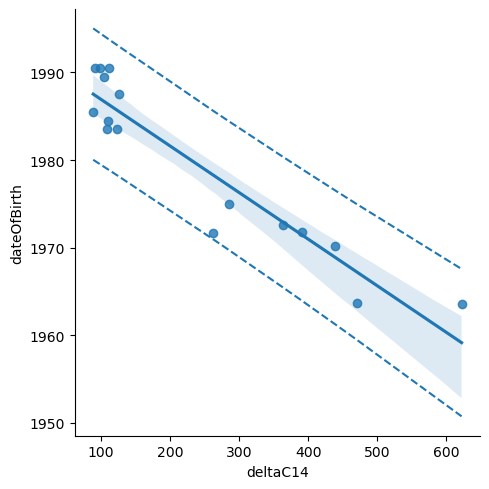

In [18]:

carbon['obs_ci_lower'] = sf['obs_ci_lower']
carbon['obs_ci_upper'] = sf['obs_ci_upper']
sns.lmplot(x='deltaC14', y='dateOfBirth', data=carbon)
sns.lineplot(x='deltaC14', y='obs_ci_lower', data=carbon, linestyle='--', color='C0')
sns.lineplot(x='deltaC14', y='obs_ci_upper', data=carbon, linestyle='--', color='C0');


- What is the 95% prediction interval of the date of birth of a corpse with $\Delta$<sup>14</sup>C = 400%?

> Write your answer here.

1963-1978

What does the 95% prediction interval tell us? It says that if you repeatedly sample corpses with a particular $\Delta$<sup>14</sup>C (400% for example), 95% of them would have a date of birth within the 95% prediction interval. The other 5% would have dates of birth outside of the interval. Therefore, the 95% prediction interval at a specific $\Delta$<sup>14</sup>C gives us a plausible range of dates of birth.